In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import math
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
import plotly.express as px
import dash
from dash import dcc, html
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import statsmodels.api as sm
df=pd.read_csv('Desktop/data science prject/data2.csv')
print(df.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]


In [39]:
cols_string = df.columns
col_counts = dict(df.count(axis=0))
col_types = {c: d for c, d in dict(df.dtypes).items()   if col_counts[c] > 10 }
_is_num = lambda x: x in (np.int64, float)
# separate them
cols_numerical = sorted([col for col, dtp in col_types.items() if _is_num(dtp)])
cols_string = sorted([col for col, dtp in col_types.items() if not _is_num(dtp)])
print(f"NUMERICAL: {cols_numerical}")
print(f"CATEGORICAL: {cols_string}")

NUMERICAL: ['Dalc', 'Fedu', 'G1', 'G2', 'G3', 'Medu', 'Walc', 'absences', 'age', 'failures', 'famrel', 'freetime', 'goout', 'health', 'studytime', 'traveltime']
CATEGORICAL: ['Fjob', 'Mjob', 'Pstatus', 'activities', 'address', 'famsize', 'famsup', 'guardian', 'higher', 'internet', 'nursery', 'paid', 'reason', 'romantic', 'school', 'schoolsup', 'sex']


In [40]:
df.drop_duplicates(inplace=True)
for col in cols_string:
    if df[col].dtype == 'object':
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      649 non-null    int32
 1   sex         649 non-null    int32
 2   age         649 non-null    int64
 3   address     649 non-null    int32
 4   famsize     649 non-null    int32
 5   Pstatus     649 non-null    int32
 6   Medu        649 non-null    int64
 7   Fedu        649 non-null    int64
 8   Mjob        649 non-null    int32
 9   Fjob        649 non-null    int32
 10  reason      649 non-null    int32
 11  guardian    649 non-null    int32
 12  traveltime  649 non-null    int64
 13  studytime   649 non-null    int64
 14  failures    649 non-null    int64
 15  schoolsup   649 non-null    int32
 16  famsup      649 non-null    int32
 17  paid        649 non-null    int32
 18  activities  649 non-null    int32
 19  nursery     649 non-null    int32
 20  higher      649 non-null    int3

In [42]:
df.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,...,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,0.348228,0.409861,16.744222,0.696456,0.295840,0.876733,2.514638,2.306626,1.941448,2.224961,...,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,0.476776,0.492187,1.218138,0.460143,0.456771,0.328996,1.134552,1.099931,1.248317,0.863487,...,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,2.000000,...,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,0.000000,0.000000,17.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,3.000000,3.000000,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [43]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

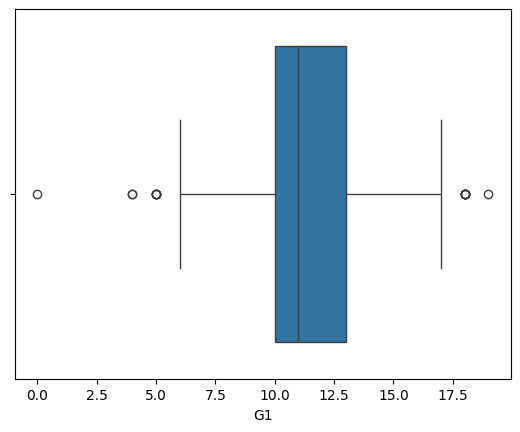

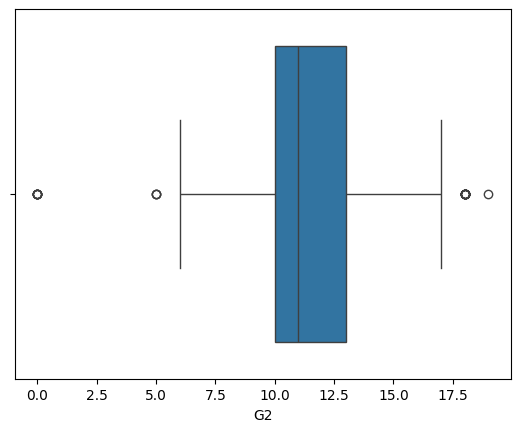

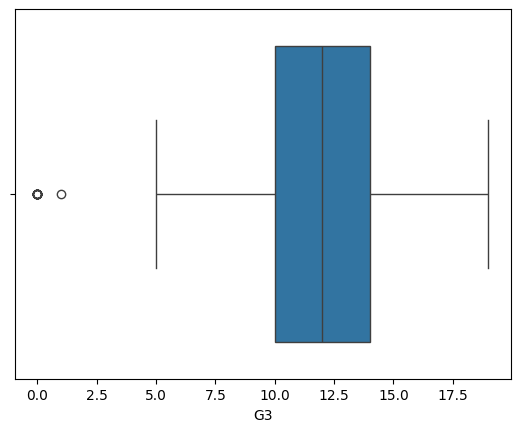

In [44]:
ax=sns.boxplot(x=df['G1'])
plt.show()
ax=sns.boxplot(x=df['G2'])
plt.show()
ax=sns.boxplot(x=df['G3'])
plt.show()

In [45]:
# Define the target variables
target_vars = ['G1', 'G2', 'G3']

# Define a dictionary to store effective features for each target variable
effective_features_dict = {target: [] for target in target_vars}

# Identify effective features for each target variable
for target in target_vars:
    for col in df.columns:
        if col in target_vars:
            continue
        
        matrix = np.corrcoef(df[col], df[target])
        value = matrix[0, 1]
        
        if abs(value) >= 0.2:
            effective_features_dict[target].append(col)

# Pre-calculate histograms, scatter plots, and heatmaps for each effective feature and target variable combination
histogram_plots = {}
scatter_plots = {}
heatmap_plots = {}

for target, features in effective_features_dict.items():
    for feature in features:
        # Histogram
        histogram_plots[(target, feature)] = px.histogram(df, x=feature, title=f'Histogram for {feature} ({target})', log_y=True)
        
        # Scatter plot
        scatter_plots[(target, feature)] = px.scatter(df, x=feature, y=target, title=f'Scatter plot of {feature} vs {target}')
        
        # Heatmap
        heatmap_plots[(target, feature)] = px.density_heatmap(df, x=feature, y=target, title=f'Heatmap of {feature} vs {target}')

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    dcc.Tabs(id='tabs', children=[
        dcc.Tab(label=target, value=target, children=[
            dcc.Tabs(id=f'tabs-{target}', children=[
                dcc.Tab(label=feature, value=feature, children=[
                    dcc.Tabs(id=f'tabs-{target}-{feature}', children=[
                        dcc.Tab(label='Histogram', value='histogram', children=[
                            html.Div([
                                dcc.Graph(id=f'histogram-{target}-{feature}', figure=histogram_plots[(target, feature)])
                            ])
                        ]),
                        dcc.Tab(label='Scatter Plot', value='scatter', children=[
                            html.Div([
                                dcc.Graph(id=f'scatter-{target}-{feature}', figure=scatter_plots[(target, feature)])
                            ])
                        ]),
                        dcc.Tab(label='Heatmap', value='heatmap', children=[
                            html.Div([
                                dcc.Graph(id=f'heatmap-{target}-{feature}', figure=heatmap_plots[(target, feature)])
                            ])
                        ])
                    ])
                ]) for feature in effective_features_dict[target]
            ])
        ]) for target in target_vars
    ])
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


In [46]:
# Define the target variables
target_vars = ['G1', 'G2', 'G3']

# Iterate over each target variable
for target in target_vars:
    print(f"\nTarget Variable: {target}")
    
    # Create a set to store effective features
    effective_features = set()
    
    # Iterate over each column in the DataFrame
    for col in df.columns:
        # Skip if the column is one of the target variables
        if col in target_vars:
            continue
        
        print(f'\nThe correlation matrix with {target} for column: {col}')
        
        # Calculate the correlation matrix between the column and the target variable
        matrix = np.corrcoef(df[col], df[target])
        print(matrix)
        
        # Extract the correlation coefficient
        value = matrix[0, 1]
        
        # Determine if the feature is effective based on correlation coefficient
        if abs(value) >= 0.2:
            print('The feature is effective')
            effective_features.add(col)
        else:
            print('The feature is not effective')
    
    # Print the effective features for the current target variable
    print(f'The features with correlation coefficient more than 0.2 for {target} are:', effective_features)



Target Variable: G1

The correlation matrix with G1 for column: school
[[ 1.         -0.29262558]
 [-0.29262558  1.        ]]
The feature is effective

The correlation matrix with G1 for column: sex
[[ 1.         -0.10410857]
 [-0.10410857  1.        ]]
The feature is not effective

The correlation matrix with G1 for column: age
[[ 1.         -0.17432224]
 [-0.17432224  1.        ]]
The feature is not effective

The correlation matrix with G1 for column: address
[[1.         0.15712654]
 [0.15712654 1.        ]]
The feature is not effective

The correlation matrix with G1 for column: famsize
[[1.         0.04723007]
 [0.04723007 1.        ]]
The feature is not effective

The correlation matrix with G1 for column: Pstatus
[[1.         0.01525135]
 [0.01525135 1.        ]]
The feature is not effective

The correlation matrix with G1 for column: Medu
[[1.         0.26047229]
 [0.26047229 1.        ]]
The feature is effective

The correlation matrix with G1 for column: Fedu
[[1.         0

In [47]:
for target in target_vars:
    sigcor = set()
    nosigcor = set()
    columns = set()

    print(f"\nProcessing for target variable: {target}")

    for col in df.columns:
        if col in target_vars:
            continue
        columns.add(col)
        correlation_coefficient, p_value = stats.pearsonr(df[col], df[target])

        print(f'Correlation coefficient between {target} and {col}: {correlation_coefficient}')
        print(f'p-value: {p_value}')

        # Interpret the results
        alpha = 0.05
        if p_value < alpha:
            print(f"Reject the null hypothesis. There is a significant correlation between {target} and {col}")
            sigcor.add(col)
        else:
            print(f"Fail to reject the null hypothesis. There is no significant correlation between {target} and {col}")
            nosigcor.add(col)

    # Calculate features with significant correlation more than 0.2 and less than 0.2
    sigcor_more_0_2 = {col for col in sigcor if abs(stats.pearsonr(df[col], df[target])[0]) >= 0.2}
    sigcor_less_0_2 = sigcor.difference(sigcor_more_0_2)

    # Print the results
    print(f'The features with significant correlation (|correlation coefficient| >= 0.2) for {target} are:', sigcor_more_0_2)
    print(f'The features with significant correlation (|correlation coefficient| < 0.2) for {target} are:', sigcor_less_0_2)
    print(f'The features with no significant correlation for {target} are:', nosigcor)


Processing for target variable: G1
Correlation coefficient between G1 and school: -0.2926255804242827
p-value: 2.793393844453102e-14
Reject the null hypothesis. There is a significant correlation between G1 and school
Correlation coefficient between G1 and sex: -0.10410856829980733
p-value: 0.007946869649725062
Reject the null hypothesis. There is a significant correlation between G1 and sex
Correlation coefficient between G1 and age: -0.174322239527609
p-value: 7.946331176855924e-06
Reject the null hypothesis. There is a significant correlation between G1 and age
Correlation coefficient between G1 and address: 0.15712653987366298
p-value: 5.815994186504203e-05
Reject the null hypothesis. There is a significant correlation between G1 and address
Correlation coefficient between G1 and famsize: 0.04723006698519027
p-value: 0.2295341772970874
Fail to reject the null hypothesis. There is no significant correlation between G1 and famsize
Correlation coefficient between G1 and Pstatus: 0.01

In [48]:
# Define the target variables
target_vars = ['G1', 'G2', 'G3']
features = df.drop(columns=target_vars)

# Print out the columns for verification
print("Features:", features.columns)
print("Target Variables:", target_vars)

# Convert all columns to numeric, coercing errors to NaN
features = features.apply(pd.to_numeric, errors='coerce')

# Drop columns with any NaN values resulting from the coercion (if any)
features = features.dropna(axis=1)

results = {}
feature_importance = pd.DataFrame(index=features.columns)

for target in target_vars:
    X = features  # All columns except the target
    y = df[target]
    
    # Add a constant to the model (intercept)
    X = sm.add_constant(X)
    
    # Fit the regression model
    model = sm.OLS(y, X).fit()
    
    # Store the results
    results[target] = model
    
    # Get the coefficients and calculate absolute values for importance
    coefficients = model.params.drop('const')  # Drop the constant term
    importance = coefficients.abs()
    
    # Store the importance values in the DataFrame
    feature_importance[target] = importance
    
    # Print the summary for each model
    print(f"Regression Results for {target}:")
    print(model.summary())
    print("\n")

# Display the feature importance
print("Feature Importance:")
print(feature_importance)

# Optionally, you can sort the importance for better readability
sorted_feature_importance = feature_importance.sort_values(by=target_vars, ascending=False)
print("Sorted Feature Importance:")
print(sorted_feature_importance)


Features: Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences'],
      dtype='object')
Target Variables: ['G1', 'G2', 'G3']
Regression Results for G1:
                            OLS Regression Results                            
Dep. Variable:                     G1   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     11.35
Date:                Mon, 20 May 2024   Prob (F-statistic):           8.05e-42
Time:                        22:09:56   Log-Likelihood:                -1433.4
No. Observations:                 649   AIC:                             2929.
Df Res

In [32]:
# Define a dictionary to store significant features for each target variable
significant_features = {}

# Iterate over each target variable
for target in target_vars:
    # Get the regression results for the target variable
    model = results[target]
    
    # Extract the p-values of the features
    p_values = model.pvalues[1:]  # Exclude the intercept term
    
    # Filter the features based on their p-values
    significant_features[target] = list(features.columns[p_values < 0.05])

# Print the significant features for each target variable
for target, features_list in significant_features.items():
    print(f"Significant features for {target}: {features_list}")


Significant features for G1: ['school', 'sex', 'studytime', 'failures', 'schoolsup', 'higher', 'absences']
Significant features for G2: ['school', 'sex', 'studytime', 'failures', 'schoolsup', 'higher', 'absences']
Significant features for G3: ['school', 'sex', 'studytime', 'failures', 'schoolsup', 'higher', 'health']


Target Variable: G1
MSE: 4.777099151986563
r2_score: 0.29758321440999413


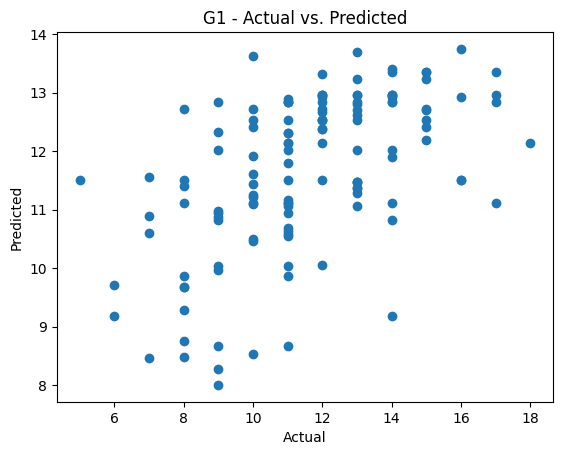

Target Variable: G2
MSE: 5.800346348505093
r2_score: 0.24035110321730235


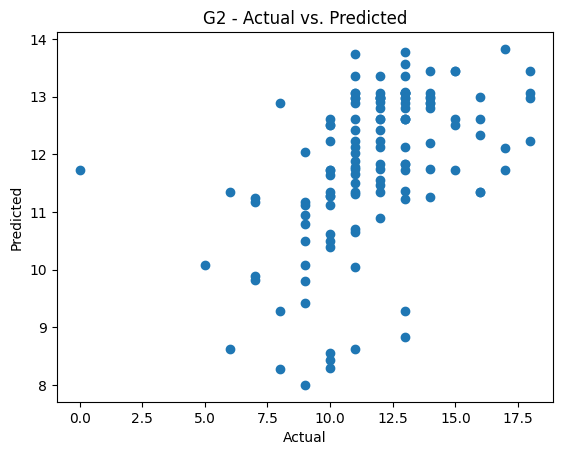

Target Variable: G3
MSE: 5.226283432400877
r2_score: 0.26430840601407


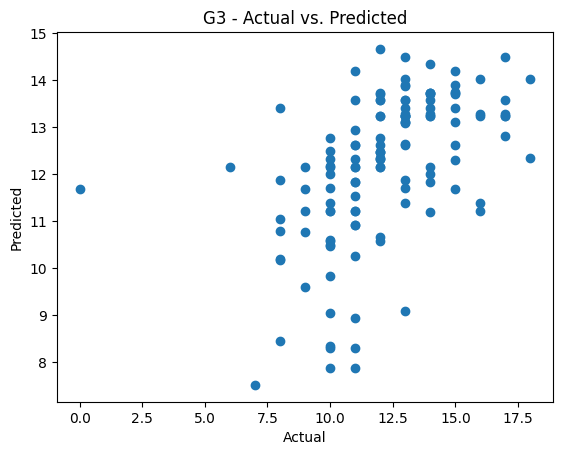

In [33]:

# Define a dictionary to store significant features for each target variable
significant_features = {}

# Iterate over each target variable
for target in target_vars:
    # Get the regression results for the target variable
    model = results[target]
    
    # Extract the p-values of the features
    p_values = model.pvalues[1:]  # Exclude the intercept term
    
    # Filter the features based on their p-values
    significant_features[target] = list(features.columns[p_values < 0.05])

# Perform regression for each target variable
for target in target_vars:
    # Select significant features for the target variable
    X = df[significant_features[target]]
    y = df[target]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    # Fit the linear regression model
    model1 = LinearRegression()
    model1.fit(X_train, y_train) 
    
    # Predict on the test set
    y_hat = model1.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_hat)
    r2 = r2_score(y_test, y_hat)
    
    # Print the evaluation metrics
    print(f"Target Variable: {target}")
    print('MSE:', mse)
    print('r2_score:', r2)
    
    # Plot the scatter plot of actual vs. predicted values
    plt.scatter(y_test, y_hat)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{target} - Actual vs. Predicted')
    plt.show()


Target Variable (Ridge Regression): G1
MSE: 4.771380860238037
r2_score: 0.2984240226036854


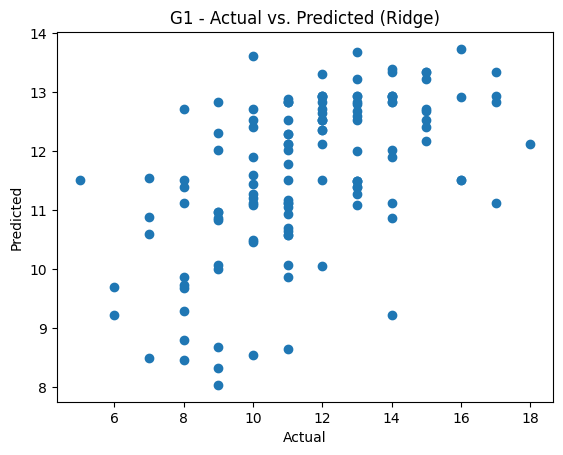

Target Variable (Ridge Regression): G2
MSE: 5.7931198734834055
r2_score: 0.24129752666307935


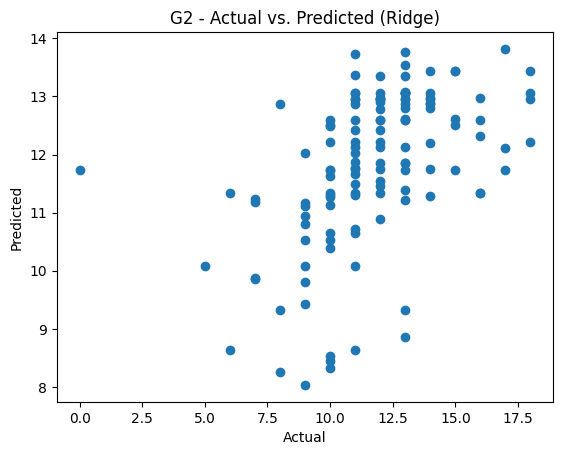

Target Variable (Ridge Regression): G3
MSE: 5.218015198507924
r2_score: 0.2654723058007604


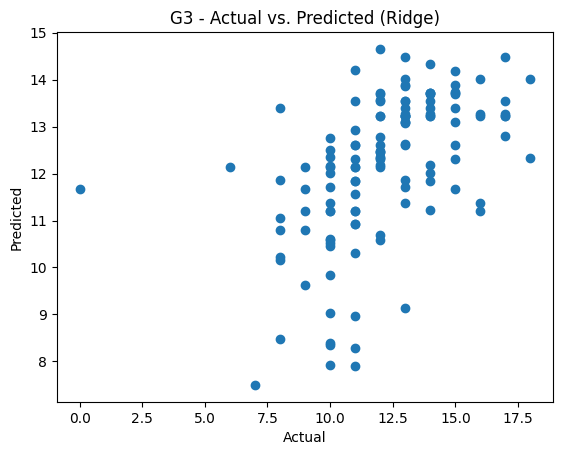

In [36]:
for target in target_vars:
    X = df[significant_features[target]]
    y = df[target]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    ridge_model = Ridge(alpha=1.0)
    ridge_model.fit(X_train, y_train) 
    
    y_hat = ridge_model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_hat)
    r2 = r2_score(y_test, y_hat)
    
    print(f"Target Variable (Ridge Regression): {target}")
    print('MSE:', mse)
    print('r2_score:', r2)
    
    plt.scatter(y_test, y_hat)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{target} - Actual vs. Predicted (Ridge)')
    plt.show()


   Study Hours  Previous Exam Score  Pass/Fail
0     4.370861            81.889703          0
1     9.556429            72.165782          1
2     7.587945            58.571657          0
3     6.387926            88.827701          1
4     2.404168            81.083870          0
Study Hours            0
Previous Exam Score    0
Pass/Fail              0
dtype: int64


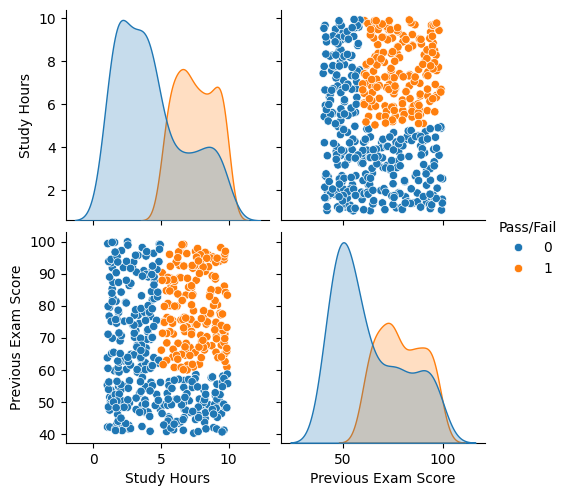


Logistic Regression:
[[58  6]
 [ 8 28]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89        64
           1       0.82      0.78      0.80        36

    accuracy                           0.86       100
   macro avg       0.85      0.84      0.85       100
weighted avg       0.86      0.86      0.86       100


K-Nearest Neighbors:
[[63  1]
 [ 3 33]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        64
           1       0.97      0.92      0.94        36

    accuracy                           0.96       100
   macro avg       0.96      0.95      0.96       100
weighted avg       0.96      0.96      0.96       100


Naive Bayes:
[[64  0]
 [ 7 29]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        64
           1       1.00      0.81      0.89        36

    accuracy                           0.93       100
   macro avg 

In [37]:

data=pd.read_csv('Desktop/data science prject/student_exam_data.csv')
# Display the first few rows of the data
print(data.head())

# Step 2: Preprocess the data (check for missing values)
print(data.isnull().sum())

# If there are missing values, you can handle them by dropping or filling. For example:
# data = data.dropna()  # This drops rows with any missing values

# Step 3: Explore the data (optional)
sns.pairplot(data, hue='Pass/Fail')
plt.show()

# Step 4: Feature Engineering
# Split the data into features (X) and target (y)
X = data[['Study Hours', 'Previous Exam Score']]
y = data['Pass/Fail']

# Standardize the feature variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Model Training
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Function to train and evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

# Train and evaluate Logistic Regression
print("\nLogistic Regression:")
lr_model = LogisticRegression(random_state=42)
evaluate_model(lr_model, X_train, X_test, y_train, y_test)

# Train and evaluate K-Nearest Neighbors
print("\nK-Nearest Neighbors:")
knn_model = KNeighborsClassifier()
evaluate_model(knn_model, X_train, X_test, y_train, y_test)

# Train and evaluate Naive Bayes
print("\nNaive Bayes:")
nb_model = GaussianNB()
evaluate_model(nb_model, X_train, X_test, y_train, y_test)